In [1]:
import itertools
import numpy as np
import pandas as pd
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings
from pyemma.coordinates.data.featurization.misc import GroupCOMFeature


In [2]:
pwd

'/scratch/general/nfs1/u1266568/msm_v2.2/tica'

In [3]:
arr1 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/min_dist_{i:03d}.npy') for i in range(11)]


In [4]:
arr2 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/contacts_{i:03d}.npy') for i in range(11)]


In [5]:
arr3 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/sidechain_dists_{i:03d}.npy') for i in range(11)]


In [6]:
arr4 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/ca_pairs_{i:03d}.npy') for i in range(11)]


In [41]:
arr5 = [pyemma.coordinates.load(f'../adaptive_sampling_features/feats_prod/com_dists_{i:03d}.npy') for i in range(11)]


In [ ]:
def slice_features_at_index(arr, index=9):
    """
    Slice the features of a given trajectory in half.
    
    Parameters:
    - arr: The feature array
    - index: The index of the trajectory's features in the array
    """
    traj_features = arr[index]
    mid_point = traj_features.shape[0] // 2
    sliced_features = traj_features[:mid_point]
    arr[index] = sliced_features
    return arr

# Apply the function to each of the arrays
arr1 = slice_features_at_index(arr1)
arr2 = slice_features_at_index(arr2)
arr3 = slice_features_at_index(arr3)
arr4 = slice_features_at_index(arr4)


In [48]:
combo_combined = [np.concatenate([a1, a2], axis=1) for a1, a2 in zip(arr1,  arr5 )]


In [97]:
tica_dev = pyemma.coordinates.tica(combo_combined, lag=200, dim=3)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [137]:
np.shape(tica_out)

/uufs/chpc.utah.edu/common/home/u1266568/software/pkg/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(11,)

In [27]:
np.shape(tica_concatenated)

(130963, 43)

# tICA stuff

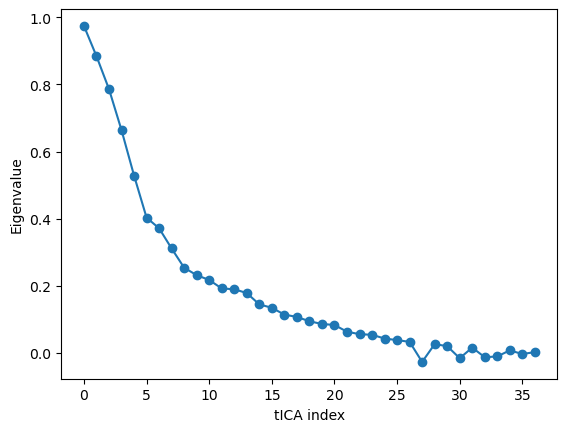

In [97]:
import matplotlib.pyplot as plt

eigenvalues = tica_dev.eigenvalues
plt.plot(eigenvalues, 'o-')
plt.xlabel('tICA index')
plt.ylabel('Eigenvalue')
plt.savefig('eigenvalues_min_dist.png',dpi=400)
plt.show()


In [98]:
def extract_significant_features(tica_model, top_n=5):
    significant_features = []
    for i, eigenvector in enumerate(tica_model.eigenvectors[:top_n]):
        # Get the indices of the features with the top contributions
        top_features_indices = np.argsort(np.abs(eigenvector))[-top_n:]
        significant_features.append(top_features_indices)
    return significant_features

top_n = 5  # you can adjust this number as per your needs
significant_features = extract_significant_features(tica_dev, top_n=top_n)
print(significant_features)


[array([0, 6, 4, 3, 2]), array([ 2, 11, 21, 13, 14]), array([11, 15,  4,  3,  2]), array([13, 12,  7,  3,  2]), array([11,  4,  3,  9,  2])]


In [99]:
pwd

'/mnt/c/users/jay/desktop/modules/modules/msm_chpc'

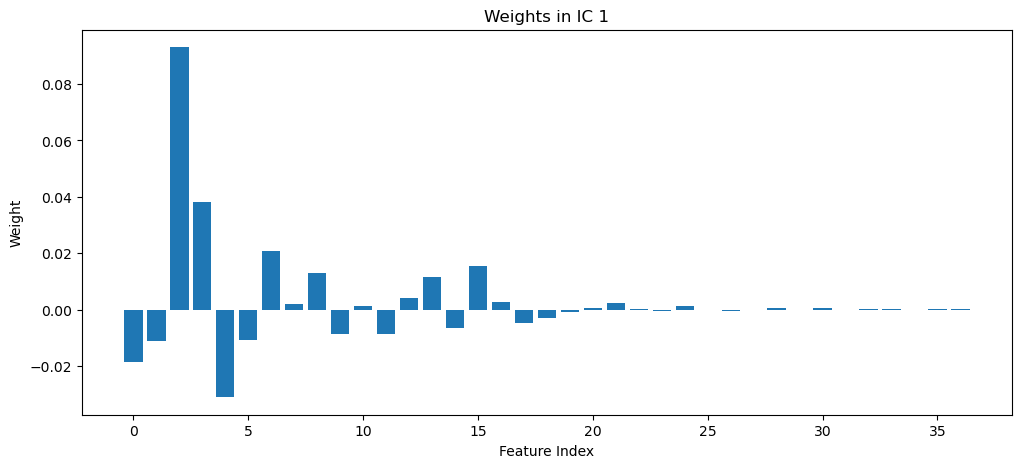

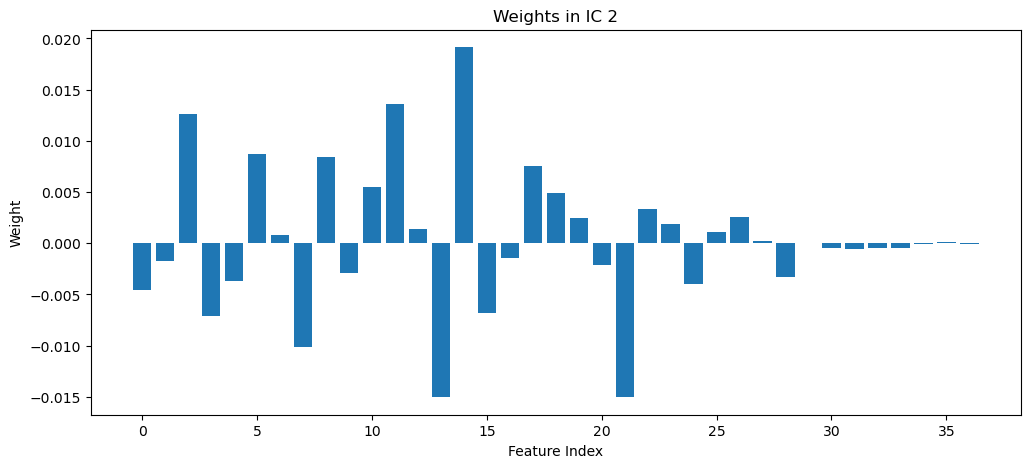

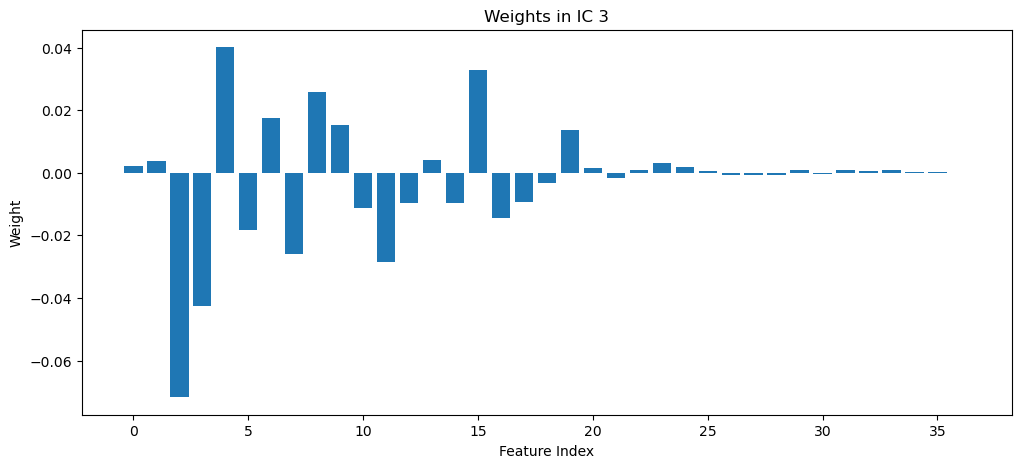

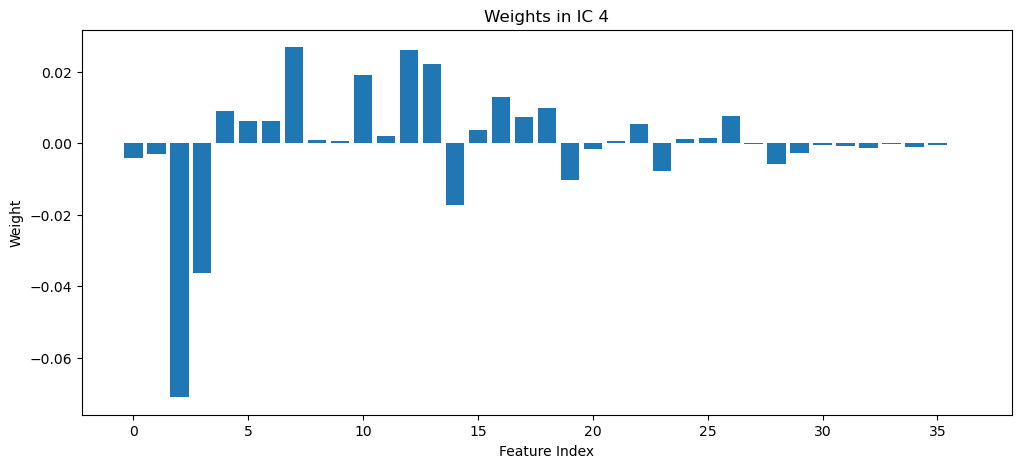

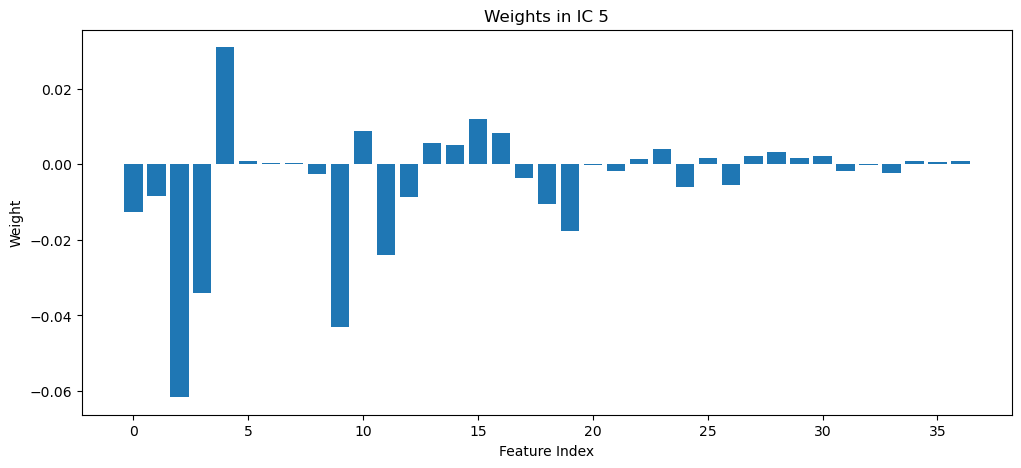

In [100]:
import matplotlib.pyplot as plt

# Number of ICs to visualize
num_ics = 5

# Extract the first 5 ICs (eigenvectors)
ics = tica_dev.eigenvectors[:num_ics]

# Plot each IC's feature weights
for i, ic in enumerate(ics):
    plt.figure(figsize=(12, 5))
    plt.bar(range(len(ic)), ic)
    plt.title(f'Weights in IC {i+1}')
    plt.xlabel('Feature Index')
    plt.ylabel('Weight')
    plt.show()


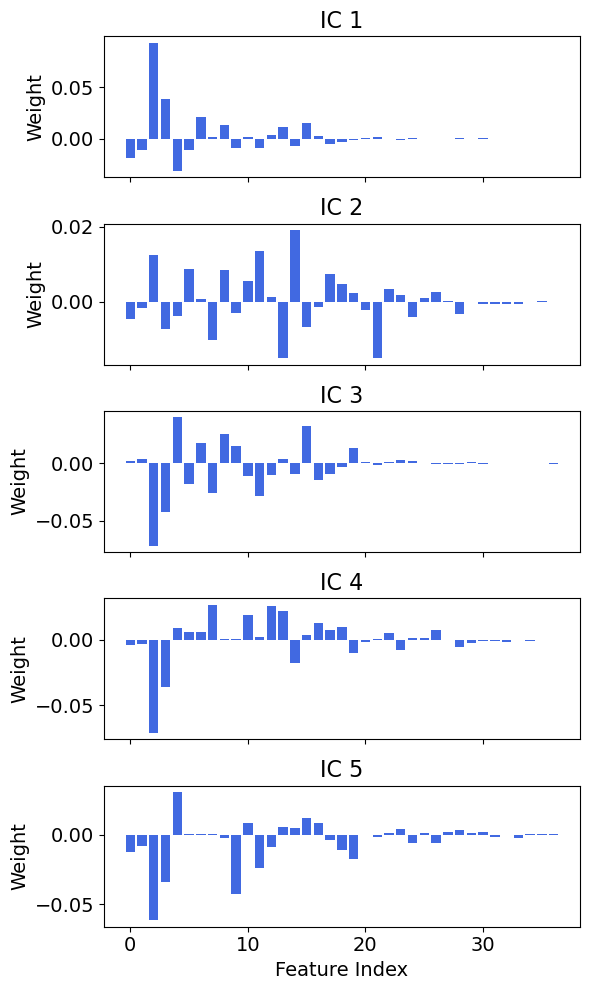

In [101]:
import matplotlib.pyplot as plt

# Number of ICs to visualize
num_ics = 5

# Extract the first 5 ICs (eigenvectors)
ics = tica_dev.eigenvectors[:num_ics]

# Set up the figure and axes for a concise presentation
fig, axes = plt.subplots(nrows=num_ics, ncols=1, figsize=(6, 2 * num_ics), sharex=True)

# Customize and plot each IC's feature weights
for i, (ic, ax) in enumerate(zip(ics, axes)):
    ax.bar(range(len(ic)), ic, color='royalblue')
    ax.set_title(f'IC {i+1}', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.set_ylabel('Weight', fontsize=14)

# Common settings
axes[-1].set_xlabel('Feature Index', fontsize=14)
plt.tight_layout()
plt.savefig('weights_contacts.png',dpi=400)
plt.show()


In [102]:
# Extract IC1
ic1 = tica_dev.eigenvectors[0]

# Get the indices of the top 10 weights by magnitude
top_10_indices = np.argsort(np.abs(ic1))[-5:]

# Extract the top 10 weights using these indices
top_10_weights = ic1[top_10_indices]

print(f"Indices of top 10 features by magnitude: {top_10_indices}")
print(f"Top 10 weights by magnitude: {top_10_weights}")


Indices of top 10 features by magnitude: [0 6 4 3 2]
Top 10 weights by magnitude: [-0.01865163  0.02093037 -0.03108752  0.03817551  0.09306708]


In [50]:
# Number of ICs and top features to consider
n_ics = 4
n_top_features = 5

# Extract the ICs
ics = tica_dev2.eigenvectors[:n_ics]

# Use a dictionary to store weights and their indices
weights_dict = {}

# Iterate over each IC
for i, ic in enumerate(ics):
    # Get the indices of the top weights by magnitude
    top_indices = np.argsort(np.abs(ic))[-n_top_features:]
    
    # Update the dictionary with the new weights and indices
    for idx in top_indices:
        weights_dict[idx] = ic[idx]

# Sort the dictionary by the magnitude of weights in descending order
sorted_weights = sorted(weights_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)

# Print the sorted weights with their magnitudes and indices
for idx, weight in sorted_weights:
    print(f"Index (adjusted): {idx + 1}, Weight: {weight:.4f}, Magnitude: {np.abs(weight):.4f}")


NameError: name 'tica_dev2' is not defined

In [104]:
# Extract the indices of top features from sorted_weights
top_feature_indices = [idx for idx, _ in sorted_weights]

# Extract top features from each trajectory
top_features = [traj[:, top_feature_indices] for traj in arr1]




In [10]:
def get_sorted_weights_and_indices(data, n_ics=3, n_top_features=4):
    tica_obj = pyemma.coordinates.tica(data, lag=50)
    ics = tica_obj.eigenvectors[:n_ics]
    
    # Use a dictionary to store weights and their indices
    weights_dict = {}

    # Iterate over each IC
    for i, ic in enumerate(ics):
        # Get the indices of the top weights by magnitude
        top_indices = np.argsort(np.abs(ic))[-n_top_features:]
        
        # Update the dictionary with the new weights and indices
        for idx in top_indices:
            weights_dict[idx] = ic[idx]

    # Sort the dictionary by the magnitude of weights in descending order
    sorted_weights = sorted(weights_dict.items(), key=lambda x: np.abs(x[1]), reverse=True)
    
    # Extract the indices of top features from sorted_weights
    top_feature_indices = [idx for idx, _ in sorted_weights]
    
    return sorted_weights, top_feature_indices

# Compute the sorted weights and top indices for each feature set
sorted_weights_arr1, top_indices_arr1 = get_sorted_weights_and_indices(arr1)
sorted_weights_arr2, top_indices_arr2 = get_sorted_weights_and_indices(arr2)
sorted_weights_arr3, top_indices_arr3 = get_sorted_weights_and_indices(arr3)
sorted_weights_arr4, top_indices_arr4 = get_sorted_weights_and_indices(arr4)

# Extend this for more feature sets as needed...


calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

In [11]:

# Extract the top features from each feature set
top_features_arr1 = [traj[:, top_indices_arr1] for traj in arr1]
top_features_arr2 = [traj[:, top_indices_arr2] for traj in arr2]
top_features_arr3 = [traj[:, top_indices_arr3] for traj in arr3]
top_features_arr4 = [traj[:, top_indices_arr4] for traj in arr4]

# Concatenate the top features from all feature sets for each trajectory
combined_features = [np.hstack((feat1, feat2, feat3,feat4)) for feat1, feat2, feat3, feat4 in zip(top_features_arr1, top_features_arr2, top_features_arr3, top_features_arr4)]


In [12]:
np.shape(combined_features[0])

(17501, 36)

In [13]:
# Perform tICA on combined features
tica_combined = pyemma.coordinates.tica(combined_features, lag=50)
ics_combined = tica_combined.eigenvectors[:1]  # Adjust the number of ICs if needed

# Dictionary to store weights and their indices for combined features
weights_dict_combined = {}

# Extract top weights from tICA components
for i, ic in enumerate(ics_combined):
    top_indices = np.argsort(np.abs(ic))[-5:]  # Taking the top 5 as an example; adjust if needed
    
    for idx in top_indices:
        weights_dict_combined[idx] = ic[idx]

# Sort weights by magnitude
sorted_weights_combined = sorted(weights_dict_combined.items(), key=lambda x: np.abs(x[1]), reverse=True)

# Map sorted weights back to the original arrays
length_arr1 = top_features_arr1[0].shape[1]
length_arr2 = top_features_arr2[0].shape[1]
length_arr3 = top_features_arr3[0].shape[1]
length_arr4 = top_features_arr4[0].shape[1]

for idx, weight in sorted_weights_combined:
    if idx < length_arr1:
        original_index = top_indices_arr1[idx % length_arr1]
        print(f"Feature comes from arr1, Original Index: {original_index + 1}, Weight: {weight:.4f}")
    elif idx < (length_arr1 + length_arr2):
        original_index = top_indices_arr2[idx % length_arr2]
        print(f"Feature comes from arr2, Original Index: {original_index + 1}, Weight: {weight:.4f}")
    elif idx < (length_arr1 + length_arr2 + length_arr3):
        original_index = top_indices_arr3[idx % length_arr3]
        print(f"Feature comes from arr3, Original Index: {original_index + 1}, Weight: {weight:.4f}")
    else:
        original_index = top_indices_arr4[idx % length_arr4]
        print(f"Feature comes from arr4, Original Index: {original_index + 1}, Weight: {weight:.4f}")


calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

Feature comes from arr2, Original Index: 7, Weight: 0.8805
Feature comes from arr2, Original Index: 20, Weight: 0.8193
Feature comes from arr2, Original Index: 15, Weight: -0.7988
Feature comes from arr1, Original Index: 13, Weight: -0.5135
Feature comes from arr2, Original Index: 3, Weight: 0.4325


In [28]:
# Specify the desired IC
desired_ic = 3  # for IC2; note that the index starts from 0

# Perform tICA on combined features
tica_combined = pyemma.coordinates.tica(combined_features, lag=100)
selected_ic = tica_combined.eigenvectors[desired_ic]

# Dictionary to store weights and their indices for the selected IC
weights_dict_selected = {}

# Extract top weights from the selected IC
top_indices = np.argsort(np.abs(selected_ic))[-10:]  # Taking the top 5 as an example; adjust if needed
for idx in top_indices:
    weights_dict_selected[idx] = selected_ic[idx]

# Sort weights by magnitude
sorted_weights_selected = sorted(weights_dict_selected.items(), key=lambda x: np.abs(x[1]), reverse=True)

# Map sorted weights back to the original arrays
length_arr1 = top_features_arr1[0].shape[1]
length_arr2 = top_features_arr2[0].shape[1]
length_arr3 = top_features_arr3[0].shape[1]
length_arr4 = top_features_arr4[0].shape[1]

for idx, weight in sorted_weights_selected:
    if idx < length_arr1:
        original_index = top_indices_arr1[idx % length_arr1]
        print(f"Feature comes from arr1, Original Index: {original_index + 1}, Weight: {weight:.4f}")
    elif idx < (length_arr1 + length_arr2):
        original_index = top_indices_arr2[idx % length_arr2]
        print(f"Feature comes from arr2, Original Index: {original_index + 1}, Weight: {weight:.4f}")
    elif idx < (length_arr1 + length_arr2 + length_arr3):
        original_index = top_indices_arr3[idx % length_arr3]
        print(f"Feature comes from arr3, Original Index: {original_index + 1}, Weight: {weight:.4f}")
    else:
        original_index = top_indices_arr4[idx % length_arr4]
        print(f"Feature comes from arr4, Original Index: {original_index + 1}, Weight: {weight:.4f}")


calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

Feature comes from arr2, Original Index: 3, Weight: 0.4415
Feature comes from arr2, Original Index: 4, Weight: -0.4155
Feature comes from arr1, Original Index: 17, Weight: -0.3990
Feature comes from arr2, Original Index: 12, Weight: 0.3596
Feature comes from arr2, Original Index: 5, Weight: 0.3444
Feature comes from arr3, Original Index: 4, Weight: 0.3288
Feature comes from arr2, Original Index: 7, Weight: -0.3137
Feature comes from arr2, Original Index: 13, Weight: 0.3076
Feature comes from arr2, Original Index: 8, Weight: 0.2881
Feature comes from arr3, Original Index: 10, Weight: 0.2560


In [22]:
# Feature comes from arr2, Original Index: 4, Weight: 0.5440
# Feature comes from arr2, Original Index: 10, Weight: 0.5399
# Feature comes from arr1, Original Index: 13, Weight: -0.4970
# Feature comes from arr2, Original Index: 7, Weight: 0.4354
# Feature comes from arr2, Original Index: 14, Weight: -0.4258
# Feature comes from arr4, Original Index: 34, Weight: 0.4136
# Feature comes from arr3, Original Index: 7, Weight: -0.4096
# Feature comes from arr3, Original Index: 10, Weight: -0.3856
# Feature comes from arr3, Original Index: 8, Weight: 0.3587
# Feature comes from arr2, Original Index: 12, Weight: -0.3468

In [ ]:
# Feature comes from arr1, Original Index: 14, Weight: -0.7680
# Feature comes from arr1, Original Index: 9, Weight: -0.5138
# Feature comes from arr3, Original Index: 14, Weight: 0.4216
# Feature comes from arr2, Original Index: 14, Weight: -0.4177
# Feature comes from arr1, Original Index: 13, Weight: -0.4150
# Feature comes from arr4, Original Index: 40, Weight: -0.4029
# Feature comes from arr2, Original Index: 4, Weight: 0.3655
# Feature comes from arr2, Original Index: 12, Weight: -0.3447
# Feature comes from arr2, Original Index: 25, Weight: 0.3267
# Feature comes from arr2, Original Index: 5, Weight: -0.3040

In [444]:
np.shape(top_features_arr3[0])

(17501, 33)

In [293]:
np.shape(top_features_arr4[0])

(17501, 11)

In [164]:
np.shape(combined_features[0])

(17501, 48)

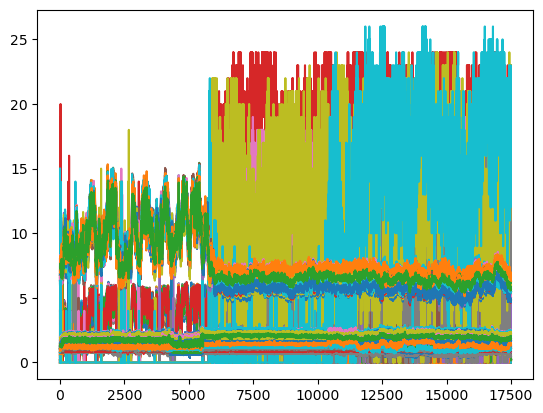

In [439]:
plt.plot(combined_features[0])

In [166]:
np.shape(top_features[0])

(17501, 12)

In [29]:
# Compute tICA on these top features
tica_combined = pyemma.coordinates.tica(data=combined_features, lag=100, dim=4)
tica_output_top_features = tica_combined.get_output()
top_cont = np.concatenate(tica_output_top_features)


calculate covariances:   0%|                             | 0/11 [00:00<?, ?it/s]

getting output of TICA:   0%|                            | 0/11 [00:00<?, ?it/s]

In [30]:
np.shape(top_cont)

(130963, 4)

In [31]:
np.shape(tica_combined.eigenvectors)

(36, 36)

In [32]:
np.shape(tica_combined.eigenvectors)

(36, 36)

In [277]:
# Number of ICs and top features to consider
n_ics = 4
n_top_features = 5

# Extract the ICs from tICA on combined features
ics_combined = tica_combined.eigenvectors[:n_ics]

# A dictionary to store weights and their indices
weights_dict_combined = {}

# Iterate over each IC
for i, ic in enumerate(ics_combined):
    # Get the indices of the top weights by magnitude
    top_indices = np.argsort(np.abs(ic))[-n_top_features:]
    
    # Update the dictionary with the new weights and indices
    for idx in top_indices:
        weights_dict_combined[idx] = ic[idx]

# Sort the dictionary by the magnitude of weights in descending order
sorted_weights_combined = sorted(weights_dict_combined.items(), key=lambda x: np.abs(x[1]), reverse=True)

# Map the indices back to the original arrays
length_arr1 = arr1[0].shape[1]  # Number of features in arr1
length_arr2 = arr2[0].shape[1]  # Number of features in arr2
length_arr3 = arr3[0].shape[1]  # Number of features in arr3
length_arr4 = arr4[0].shape[1]  # Number of features in arr4

for idx, weight in sorted_weights_combined:
    if idx < length_arr1:
        print(f"Feature comes from arr1, Index: {idx + 1}, Weight: {weight:.4f}")
    elif idx < (length_arr1 + length_arr2):
        print(f"Feature comes from arr2, Index: {idx - length_arr1 + 1}, Weight: {weight:.4f}")
    elif idx < (length_arr1 + length_arr2 + length_arr3):
        print(f"Feature comes from arr3, Index: {idx - length_arr1 - length_arr2 + 1}, Weight: {weight:.4f}")
    else:
        print(f"Feature comes from arr4, Index: {idx - length_arr1 - length_arr2 - length_arr3 + 1}, Weight: {weight:.4f}")


Feature comes from arr1, Index: 15, Weight: 1.3829
Feature comes from arr1, Index: 18, Weight: 1.0412
Feature comes from arr1, Index: 28, Weight: -0.9844
Feature comes from arr2, Index: 6, Weight: 0.9742
Feature comes from arr1, Index: 23, Weight: -0.9633
Feature comes from arr1, Index: 12, Weight: -0.8007
Feature comes from arr1, Index: 31, Weight: 0.7549
Feature comes from arr1, Index: 29, Weight: 0.7492
Feature comes from arr1, Index: 13, Weight: -0.7260
Feature comes from arr1, Index: 10, Weight: -0.7131
Feature comes from arr1, Index: 26, Weight: -0.7061
Feature comes from arr1, Index: 34, Weight: -0.6852
Feature comes from arr2, Index: 4, Weight: 0.6439
Feature comes from arr1, Index: 17, Weight: 0.6364
Feature comes from arr1, Index: 27, Weight: 0.6110
Feature comes from arr1, Index: 35, Weight: 0.5828
Feature comes from arr1, Index: 22, Weight: 0.5654
Feature comes from arr1, Index: 21, Weight: 0.5409


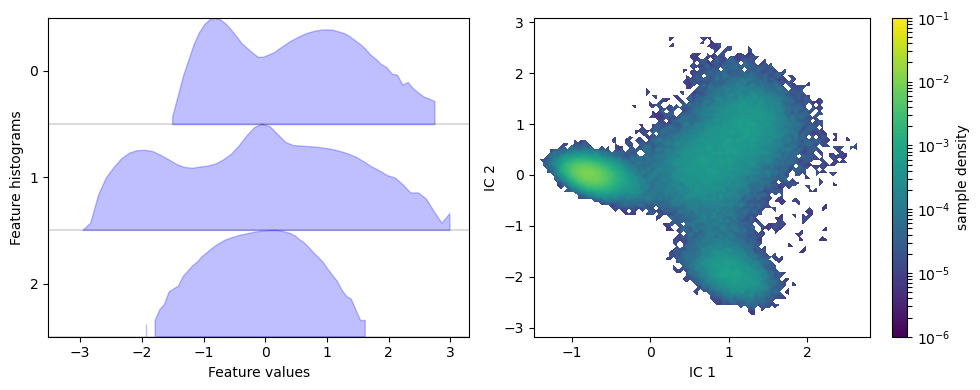

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

In [11]:
### this is for new iteration

In [160]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_out, k=100, max_iter=200, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                                                                            …

kmeans iterations:   0%|                                                                                      …

getting output of KmeansClustering:   0%|                                                                     …

In [161]:
pwd

'/scratch/general/nfs1/u1266568/msm_v2.2/tica'

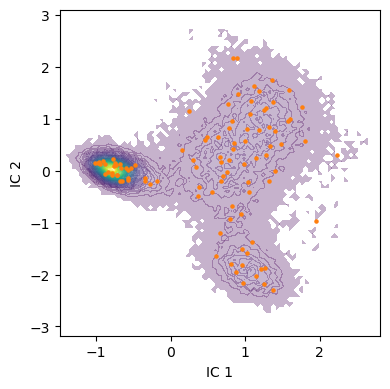

In [162]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('cluster_update.png',dpi=300)

estimating BayesianMSM:   0%|                                                                                 …

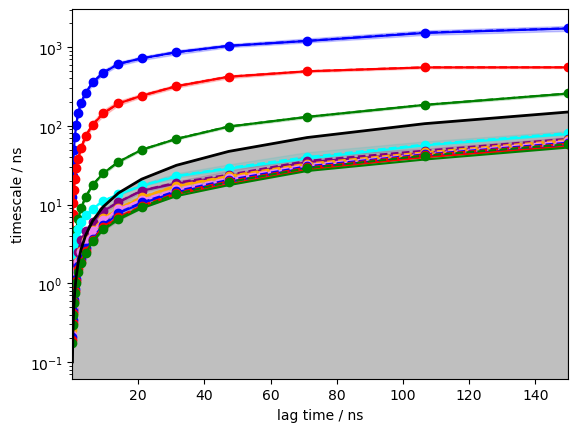

In [163]:
its = pyemma.msm.its(cluster.dtrajs, lags=1500, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);
# plt.savefig('its_update.png',dpi=300)

In [164]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=300, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[196]: compute stat. inefficiencies:   0%|                      …

pyemma.msm.estimators.bayesian_msm.BayesianMSM[196]: Sampling MSMs:   0%|                                     …

fraction of states used = 1.00
fraction of counts used = 1.00


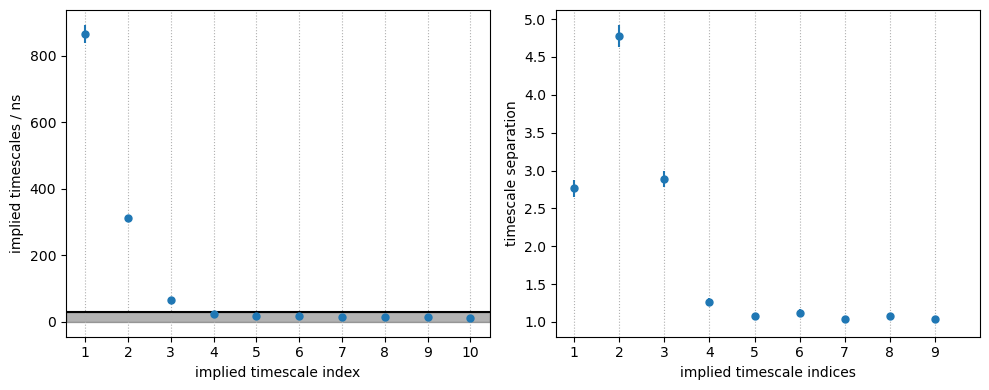

In [165]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('4state_spectral_update.png',dpi=300)

estimating BayesianMSM:   0%|                                                                                 …

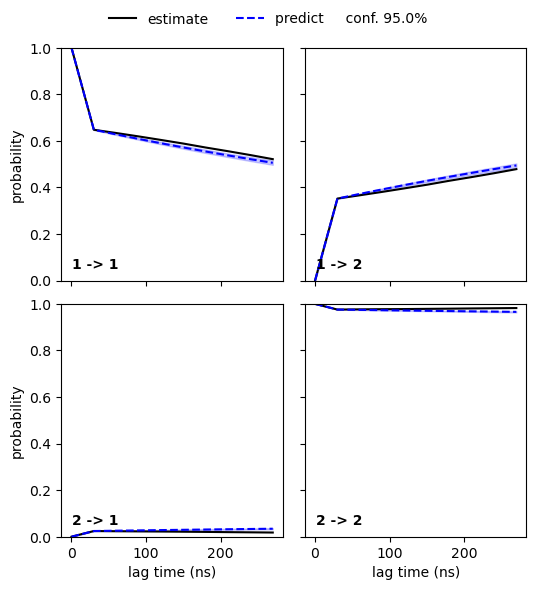

In [167]:
nstates = 2
cktest = msm.cktest(nstates)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
# plt.savefig('cktets.png',dpi = 300)

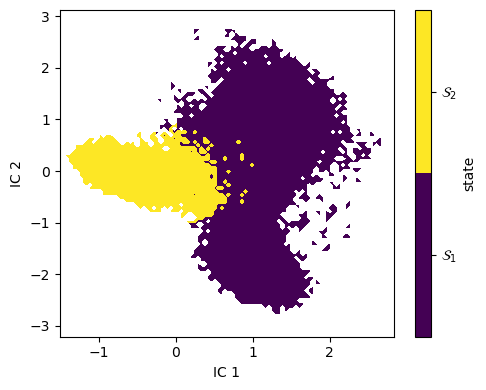

In [168]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_paper.png',dpi=400)

In [130]:
import pickle

with open('my_msm.pkl', 'wb') as f:
    pickle.dump(msm, f)


In [135]:
import numpy as np

# Assuming you have an MSM object named 'msm'
transition_matrix = msm.transition_matrix

stationary_distribution = msm.stationary_distribution

eigenvectors_right = msm.eigenvectors_right()
eigenvectors_left = msm.eigenvectors_left()
eigenvalues = msm.eigenvalues()

eigenvectors_right = msm.eigenvectors_right()
eigenvectors_left = msm.eigenvectors_left()
eigenvalues = msm.eigenvalues()



In [136]:
np.savez('msm_data.npz', 
         transition_matrix=transition_matrix, 
         stationary_distribution=stationary_distribution, 
         eigenvectors_right=eigenvectors_right, 
         eigenvectors_left=eigenvectors_left, 
         eigenvalues=eigenvalues)


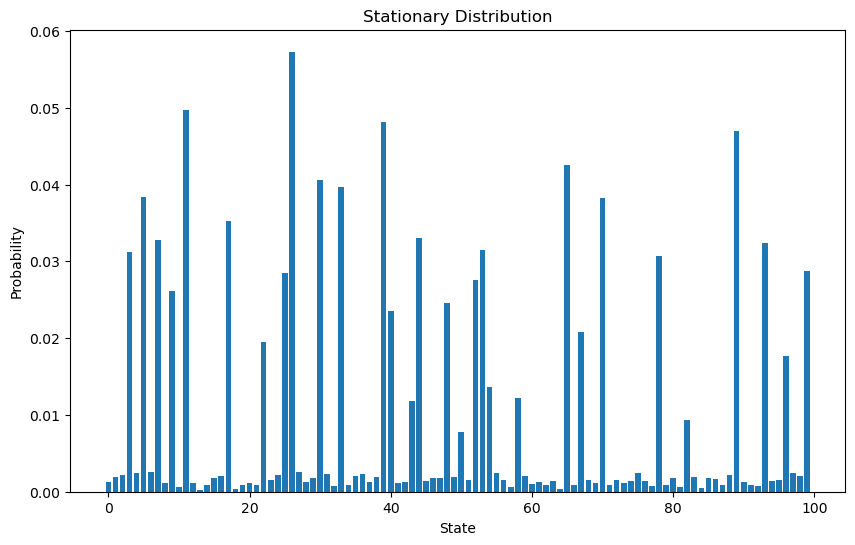

In [169]:
# Extract stationary distribution
pi = msm.stationary_distribution

# Plot stationary distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(pi)), pi)
plt.xlabel('State')
plt.ylabel('Probability')
plt.title('Stationary Distribution')
plt.show()


In [133]:
# Check detailed balance
is_detailed_balance = msm.is_reversible
print(f"The MSM satisfies detailed balance: {is_detailed_balance}")


The MSM satisfies detailed balance: True


In [170]:
from itertools import product
# Swap the metastable sets for states 0 and 1
# msm.metastable_sets[0], msm.metastable_sets[1] = msm.metastable_sets[1], msm.metastable_sets[0]

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2
1,0.00,409.31
2,7822.11,0.00


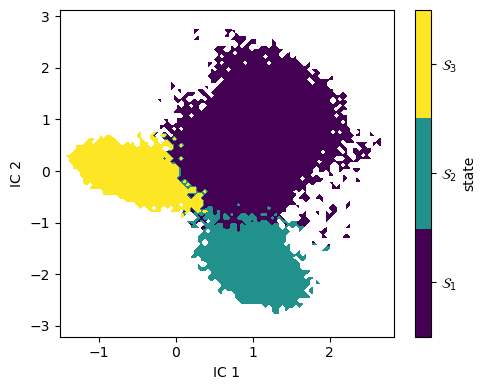

In [112]:
# Swap states 0 and 1 in metastable_traj
metastable_traj_swapped = np.where(metastable_traj == 0, -1, metastable_traj)  # temporarily label state 0 as -1
metastable_traj_swapped = np.where(metastable_traj_swapped == 1, 0, metastable_traj_swapped)  # label state 1 as 0
metastable_traj_swapped = np.where(metastable_traj_swapped == -1, 1, metastable_traj_swapped)  # label state -1 (old state 0) as 1

# Now plot with the swapped metastable_traj
fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj_swapped, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update_swapped.png', dpi=400)


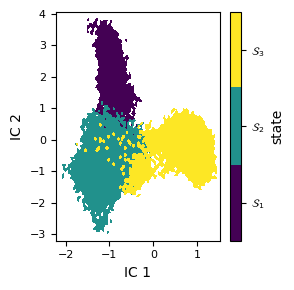

In [46]:
fig, ax = plt.subplots(figsize=(3, 3))  # Adjust figsize for smaller plot

_, _, misc = pyemma.plots.plot_state_map(
    *top_cont[:, :2].T, metastable_traj, ax=ax)

# Set label sizes for a cleaner look
ax.set_xlabel('IC 1', fontsize=10)
ax.set_ylabel('IC 2', fontsize=10)
ax.tick_params(labelsize=8)

# Adjust color bar labels
cbar = misc['cbar']
cbar.set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1) for i in range(nstates)])
cbar.ax.tick_params(labelsize=8)

# Ensure layout is tight
fig.tight_layout()

# Save the figure with higher dpi
fig.savefig('pcca_paper.png', dpi=400)


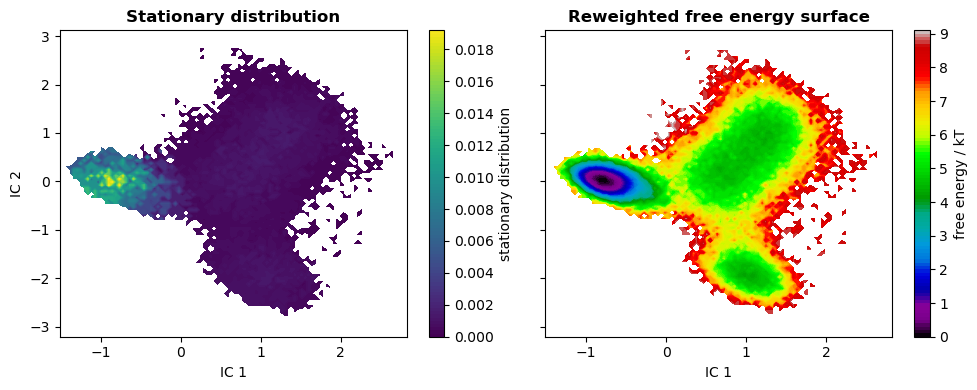

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
# plt.savefig('macro_energy_update.png',dpi=400)

/tmp/ipykernel_2684756/1910399863.py:12: RuntimeWarning: divide by zero encountered in log
  fes_kBT = -np.log(hist)


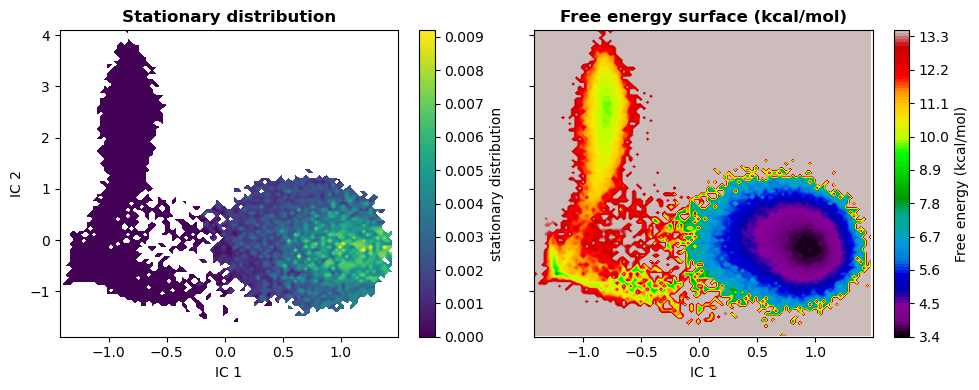

In [33]:
# Compute 2D histogram
kB=1.987e-3
T=310
hist, xedges, yedges = np.histogram2d(
    tica_concatenated[:, 0], tica_concatenated[:, 1], 
    bins=100, weights=np.concatenate(msm.trajectory_weights()))

# Convert histogram to probability
hist /= hist.sum()

# Convert probabilities to free energy in units of kBT
fes_kBT = -np.log(hist)

# Handle infinities
fes_kBT[np.isinf(fes_kBT)] = fes_kBT[~np.isinf(fes_kBT)].max()

# Convert the free energy to kcal/mol
fes_kcal_per_mol = fes_kBT * kB * T

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot stationary distribution
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')

# Plot free energy in kcal/mol
contourf = axes[1].contourf(
    (xedges[:-1] + xedges[1:]) / 2,
    (yedges[:-1] + yedges[1:]) / 2,
    fes_kcal_per_mol.T,  # transpose due to how meshgrid works
    levels=100,  # you can adjust the number of levels or provide explicit levels
    cmap='nipy_spectral'
)
cbar = fig.colorbar(contourf, ax=axes[1])
cbar.set_label('Free energy (kcal/mol)')

for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Free energy surface (kcal/mol)', fontweight='bold')
fig.tight_layout()
plt.savefig('pmf_paper.png',dpi=400)


In [115]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))

state	π		G/kT
1	0.033043	3.409935
2	0.109248	2.214138
3	0.857709	0.153490


In [116]:
print('state\tπ\t\tG (kcal/mol)')
kT = 0.61593626  # Boltzmann's constant at 310 K in kcal/mol
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    G_kcal_per_mol = -kT * np.log(p)
    print('{}\t{:f}\t{:f}'.format(i + 1, p, G_kcal_per_mol))


state	π		G (kcal/mol)
1	0.033043	2.100303
2	0.109248	1.363768
3	0.857709	0.094540


In [47]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4
1,0.00,1695387.58,5999.76,1945.86
2,38638654.53,0.00,4945.99,1057.95
3,50634786.82,13610015.17,0.00,259.64
4,50635313.36,13610752.76,4708.81,0.00


In [403]:
n_macrostates = 3  # or however many macrostates you have
mapping = {0: 0, 1: 2, 2: 1}  # map old states to new states

# Create a new assignment of microstates to macrostates
new_assignment = np.zeros_like(msm.metastable_assignments)
for i in range(n_macrostates):
    new_assignment[msm.metastable_assignments == i] = mapping[i]

# Replace the old assignments with the new ones
# msm.metastable_assignments = new_assignment

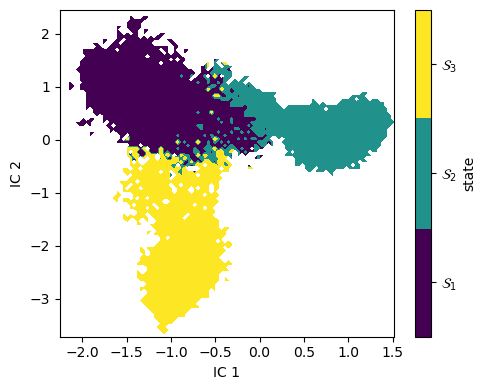

In [404]:
metastable_traj = new_assignment[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *top_cont[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

In [405]:
# Compute MFPTs between all pairs of new PCCA+ states
mfpts = np.zeros((len(mapping), len(mapping)))
for i in range(len(mapping)):
    for j in range(len(mapping)):
        if i != j:
            mfpts[i, j] = msm.mfpt(
                msm.metastable_sets[new_assignment[i]],
                msm.metastable_sets[new_assignment[j]]
            )

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3
1,0.00,1.767473e+08,1523.11
2,5140744.41,0.000000e+00,29153.94
3,11383181.46,1.832675e+08,0.00


In [406]:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', A, B), msm.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', B, A), msm.sample_std('mfpt', B, A)))

MFPT 1 -> other: ( 698.1 ±  22.7) ns
MFPT other -> 1: (9645507.2 ± 1919552.4) ns


# Overlay the network

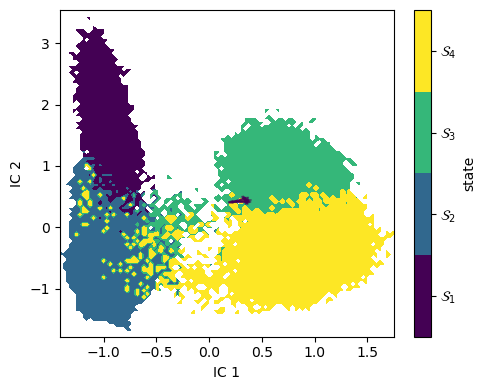

In [136]:
# Compute centroids of metastable sets
centroids = np.zeros((nstates, 2))
for i, s in enumerate(msm.metastable_sets):
    centroids[i] = np.mean(tica_concatenated[s, :2], axis=0)

# Create the PCCA plot
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)

# Draw arrows based on MFPT
for i, j in product(range(nstates), repeat=2):
    if i != j:
        ax.arrow(centroids[i, 0], centroids[i, 1], 
                 centroids[j, 0] - centroids[i, 0], 
                 centroids[j, 1] - centroids[i, 1], 
                 alpha=0.5, width=0.01, 
                 color=plt.cm.viridis(1.0/mfpt[i,j]))

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update_with_mfpt.png',dpi=400)


In [140]:
# Compute centroids of metastable sets
centroids = np.zeros((nstates, 2))
for i, s in enumerate(msm.metastable_sets):
    centroids[i] = np.mean(tica_concatenated[s, :2], axis=0)
print("Centroids:", centroids)


Centroids: [[0.35350201 0.41275638]
 [0.22638784 0.41321376]
 [0.33496535 0.46813259]
 [0.3586342  0.43710795]]


In [144]:
# Directly calculate centroids based on metastable assignments
centroids = np.array([tica_concatenated[metastable_traj == i].mean(axis=0) 
                      for i in range(nstates)])
print("Centroids:", centroids)


Centroids: [[-9.8643702e-01  1.7427005e+00  9.8702794e-01  1.9532537e-02
  -4.0098831e-02  1.9104637e-02  3.6784381e-02 -3.0163933e-02
  -2.0590913e-02  7.9732919e-03 -1.1601642e-02]
 [-1.0534618e+00 -6.1109686e-01 -2.6962179e-01  4.2232718e-02
   4.3523512e-03 -1.8255463e-02 -6.8739980e-02 -5.7877265e-03
   1.0146887e-02 -2.3120322e-04 -1.1681436e-02]
 [ 6.6133064e-01  8.1872624e-01 -1.4632996e+00 -2.5769043e-01
  -1.4328860e-02  1.8138366e-02 -6.6837152e-03 -1.9905364e-04
   1.8962250e-03  3.0037446e-03 -1.9113152e-04]
 [ 8.1707746e-01 -3.1674343e-01  4.8464730e-01  1.0213224e-01
  -5.7490491e-03  2.5415034e-03  1.3582547e-02  9.2003774e-03
   1.2298470e-02 -4.9306178e-03  3.2821372e-03]]


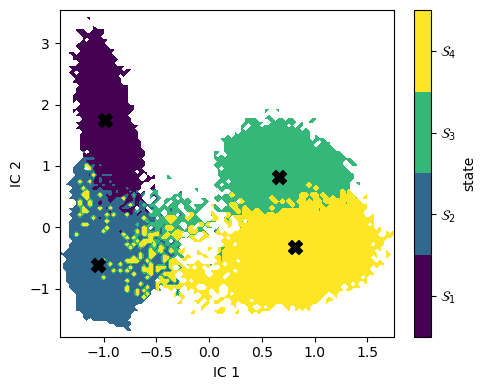

In [145]:
fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)

# Plot centroids as large markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()


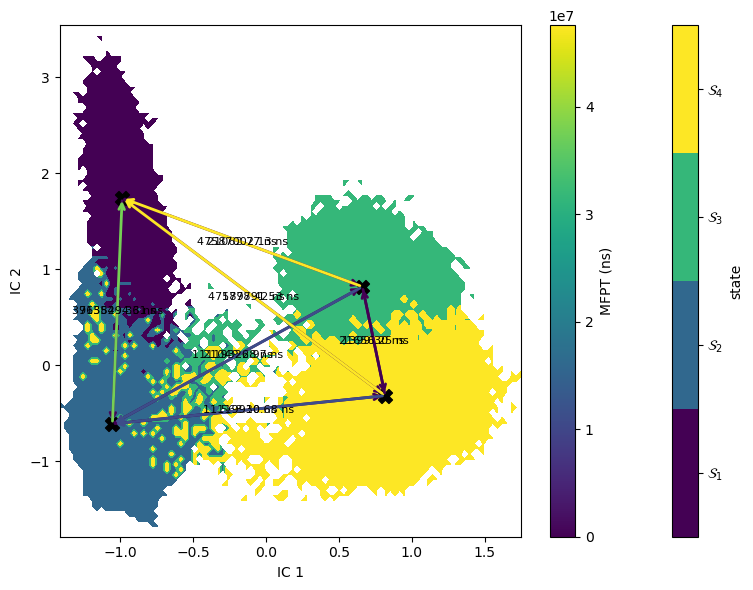

In [148]:
fig, ax = plt.subplots(figsize=(8, 6))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)

# Plot centroids as large markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

# Normalize the MFPT values for color mapping
norm_mfpt = plt.Normalize(vmin=0, vmax=mfpt.max())

# Draw arrows based on MFPT and label them with MFPT values
for i, j in product(range(nstates), repeat=2):
    if i != j:
        # Draw arrow
        ax.annotate("",
                    xy=centroids[j, :2], 
                    xytext=centroids[i, :2],
                    arrowprops=dict(arrowstyle="->",
                                    lw=2,
                                    color=plt.cm.viridis(norm_mfpt(mfpt[i, j]))),
                    )
        
        # Annotate arrow with MFPT value
        mid_point = (centroids[i] + centroids[j]) / 2
        ax.text(mid_point[0], mid_point[1], f"{mfpt[i, j]:.2f} ns", 
                ha="center", va="center", fontsize=8, color="black")

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm_mfpt, cmap='viridis'), ax=ax)
cbar.set_label('MFPT (ns)')

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()


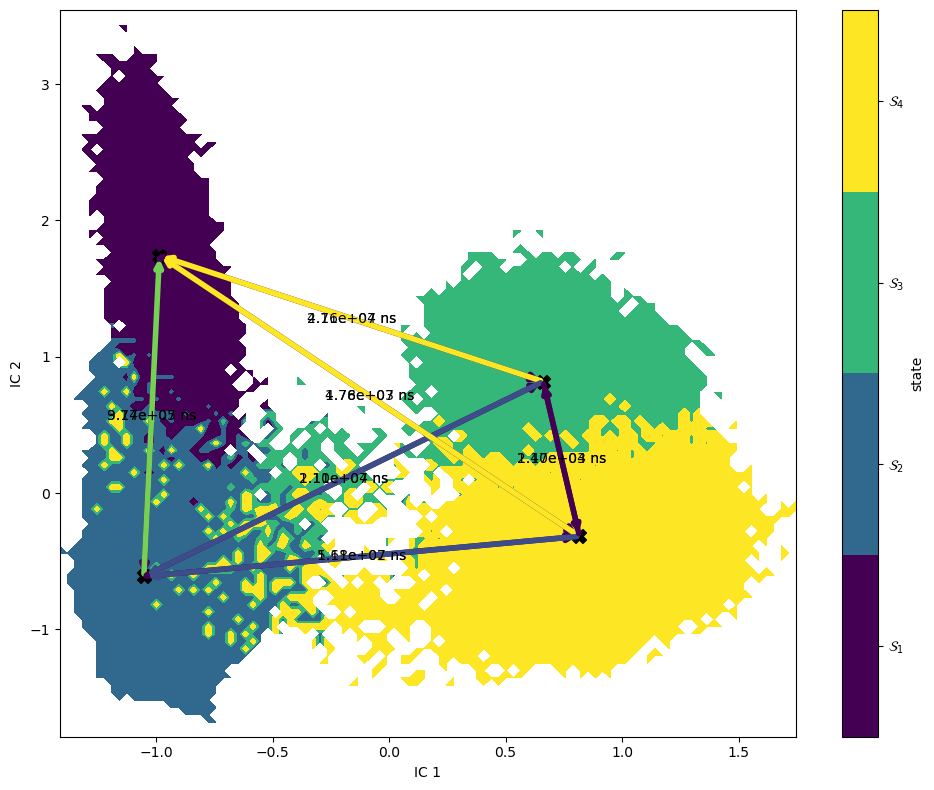

In [153]:
fig, ax = plt.subplots(figsize=(10, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)

# Plot centroids as large markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

# Draw arrows based on MFPT and label them with MFPT values
for i, j in product(range(nstates), repeat=2):
    if i != j:
        # Draw arrow
        ax.annotate("",
                    xy=centroids[j, :2], 
                    xytext=centroids[i, :2],
                    arrowprops=dict(arrowstyle="->",
                                    lw=4,  # thicker lines
                                    color=plt.cm.viridis(norm_mfpt(mfpt[i, j]))),
                    )
        
        # Annotate arrow with MFPT value in scientific notation
        mid_point = (centroids[i] + centroids[j]) / 2
        ax.text(mid_point[0], mid_point[1], f"{mfpt[i, j]:.2e} ns", 
                ha="center", va="center", fontsize=10, color="black")  # bigger text size

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()


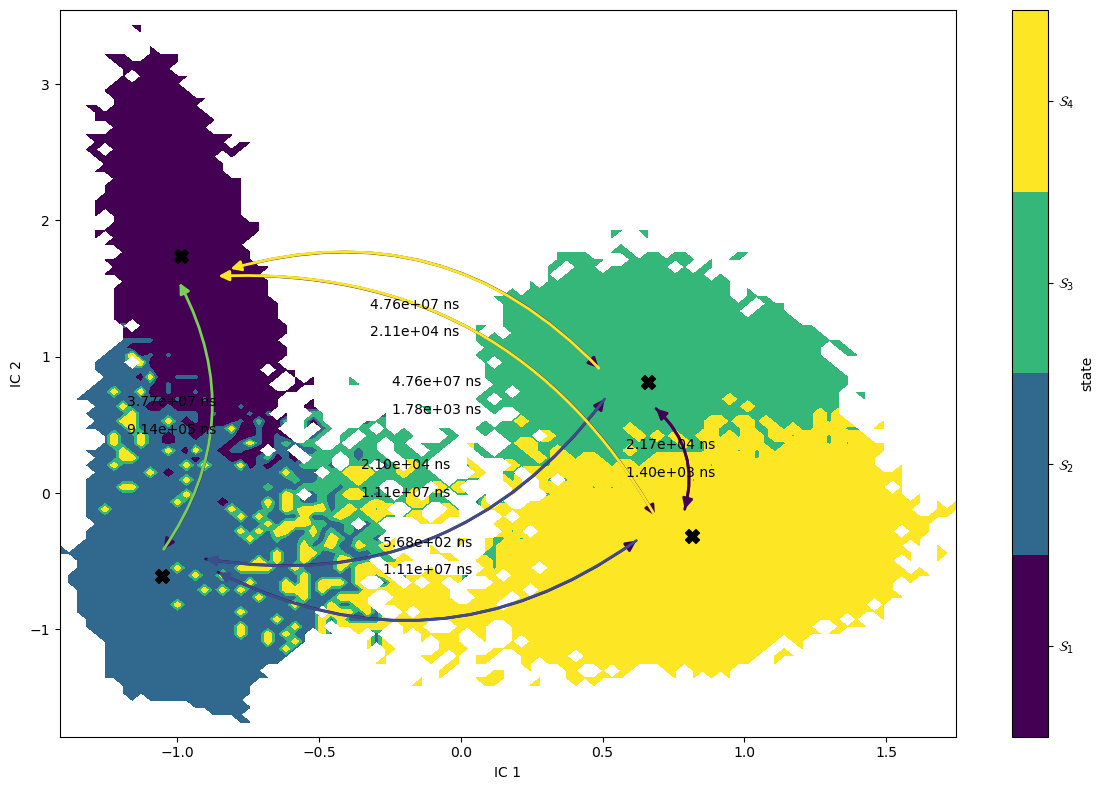

In [178]:
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots(figsize=(12, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)

# Plot centroids as large markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

arrow_offset = 0.2  # distance from centroid to start/end of arrow
text_offset = 0.1   # distance from mid-point of arrow to place text

# Draw curved arrows and label them with MFPT values
for i, j in product(range(nstates), repeat=2):
    if i != j:
        # Calculate start and end points of the arrow, so they don't touch centroids directly
        direction = centroids[j, :2] - centroids[i, :2]  # Only use the first two dimensions
        direction /= np.linalg.norm(direction)
        start_point = centroids[i, :2] + arrow_offset * direction  # Only use the first two dimensions
        end_point = centroids[j, :2] - arrow_offset * direction  # Only use the first two dimensions
        
        # Determine curvature direction (upward or downward) based on ICs
        if centroids[j, 1] > centroids[i, 1]:
            curve_direction = "top"
        else:
            curve_direction = "bottom"
        
        # Draw curved arrow
        cp = ConnectionPatch(start_point, end_point, coordsA="data", coordsB="data",
                             arrowstyle="-|>", mutation_scale=15, lw=2,
                             connectionstyle=f"arc3,rad={0.3 if curve_direction == 'top' else -0.3}",
                             color=plt.cm.viridis(norm_mfpt(mfpt[i, j])))
        ax.add_patch(cp)
        
        # Annotate arrow with MFPT value in scientific notation
        mid_point = (start_point + end_point) / 2
        if curve_direction == "top":
            ax.text(mid_point[0], mid_point[1] + text_offset, f"{mfpt[i, j]:.2e} ns", 
                    ha="center", va="center", fontsize=10, color="black")
        else:
            ax.text(mid_point[0], mid_point[1] - text_offset, f"{mfpt[i, j]:.2e} ns", 
                    ha="center", va="center", fontsize=10, color="black")

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1) for i in range(nstates)])
fig.tight_layout()


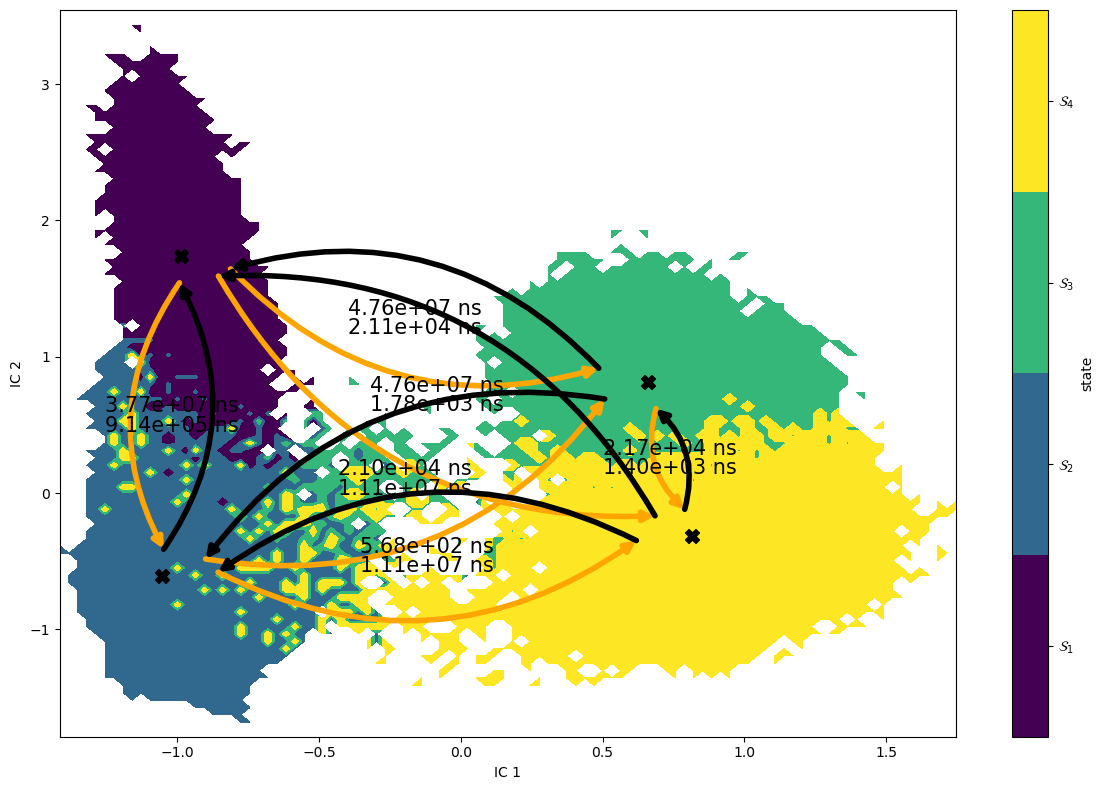

In [173]:
from matplotlib.patches import ConnectionPatch

fig, ax = plt.subplots(figsize=(12, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)

# Plot centroids as large markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

arrow_offset = 0.2  # distance from centroid to start/end of arrow

# Draw curved arrows and label them with MFPT values
for i, j in product(range(nstates), repeat=2):
    if i != j:
        # Calculate start and end points of the arrow, so they don't touch centroids directly
        direction = centroids[j, :2] - centroids[i, :2]
        direction /= np.linalg.norm(direction)
        start_point = centroids[i, :2] + arrow_offset * direction
        end_point = centroids[j, :2] - arrow_offset * direction
        
        # Determine arrow color and curvature magnitude
        if i < j:
            arrow_color = "orange"
            rad_value = 0.3
        else:
            arrow_color = "black"
            rad_value = 0.3
        
        # Draw curved arrow
        cp = ConnectionPatch(start_point, end_point, coordsA="data", coordsB="data",
                             arrowstyle="-|>", mutation_scale=15, lw=4,
                             connectionstyle=f"arc3,rad={rad_value}",
                             color=arrow_color)
        ax.add_patch(cp)
        
        # Annotate arrow with MFPT value in scientific notation
        mid_point = (start_point + end_point) / 2

        # Determine text position based on the relative y-coordinates of the states
        if centroids[i, 1] < centroids[j, 1]:  # Arrow is pointing upwards
            text_position = (mid_point[0], mid_point[1] + 0.07)
        else:  # Arrow is pointing downwards
            text_position = (mid_point[0], mid_point[1] - 0.07)
        
        ax.text(*text_position, f"{mfpt[i, j]:.2e} ns", 
                ha="center", va="center", fontsize=15, color="black")

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1) for i in range(nstates)])
fig.tight_layout()


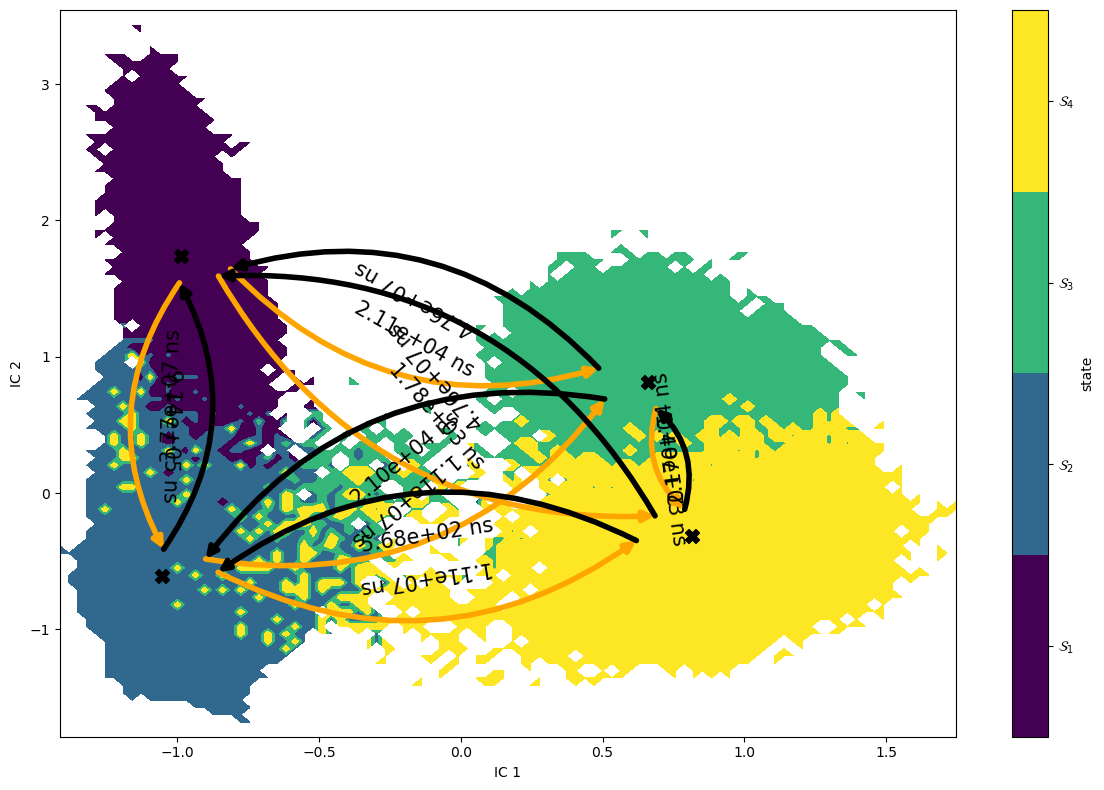

In [177]:
from matplotlib.patches import ConnectionPatch
import numpy as np

fig, ax = plt.subplots(figsize=(12, 8))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)

# Plot centroids as large markers
ax.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='X', label='Centroids')

arrow_offset = 0.2  # distance from centroid to start/end of arrow
arc_apex_offset = 0.15  # factor to compute the arc's apex along the arrow's direction

# Draw curved arrows and label them with MFPT values
for i, j in product(range(nstates), repeat=2):
    if i != j:
        # Calculate start and end points of the arrow, so they don't touch centroids directly
        direction = centroids[j, :2] - centroids[i, :2]
        direction /= np.linalg.norm(direction)
        start_point = centroids[i, :2] + arrow_offset * direction
        end_point = centroids[j, :2] - arrow_offset * direction
        
        # Determine arrow color and curvature magnitude
        if i < j:
            arrow_color = "orange"
            rad_value = 0.3
        else:
            arrow_color = "black"
            rad_value = 0.3
        
        # Draw curved arrow
        cp = ConnectionPatch(start_point, end_point, coordsA="data", coordsB="data",
                             arrowstyle="-|>", mutation_scale=15, lw=4,
                             connectionstyle=f"arc3,rad={rad_value}",
                             color=arrow_color)
        ax.add_patch(cp)
        
        # Compute the arc's apex for placing the timescale text
        mid_point = (start_point + end_point) / 2

        # Adjust the position slightly above or below depending on the arrow direction
        if centroids[i, 1] < centroids[j, 1]:  # Arrow is pointing upwards
            text_position = (mid_point[0], mid_point[1] + arc_apex_offset)
        else:  # Arrow is pointing downwards
            text_position = (mid_point[0], mid_point[1] - arc_apex_offset)
        
        # Calculate the angle of the arrow
        dy = end_point[1] - start_point[1]
        dx = end_point[0] - start_point[0]
        angle = np.degrees(np.arctan2(dy, dx))

        ax.text(text_position[0], text_position[1], f"{mfpt[i, j]:.2e} ns", 
                ha="center", va="center", fontsize=15, color="black", rotation=angle, rotation_mode='anchor')

ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1) for i in range(nstates)])
fig.tight_layout()


NameError: name 'file_path' is not defined

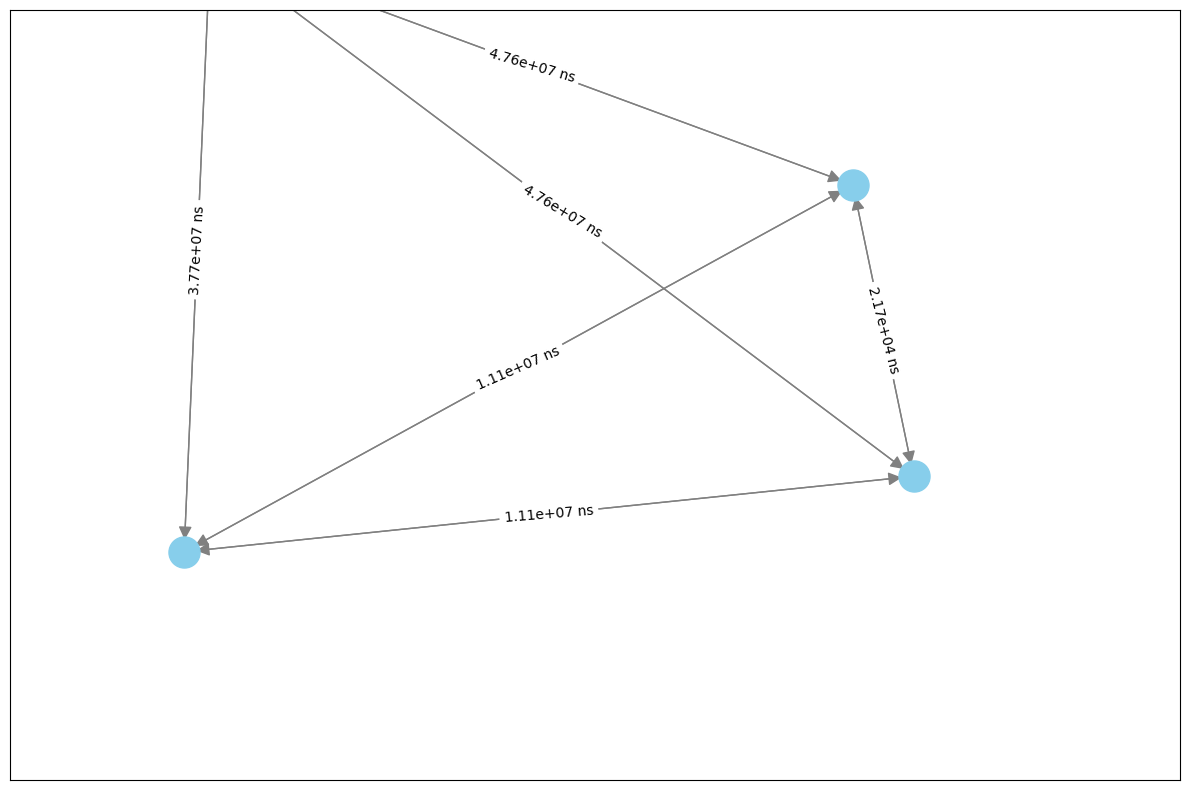

In [181]:
import networkx as nx

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes for each metastable state
for i in range(nstates):
    G.add_node(i, pos=centroids[i, :2])

# Add edges with MFPT values
for i, j in product(range(nstates), repeat=2):
    if i != j:
        G.add_edge(i, j, weight=mfpt[i, j])

fig, ax = plt.subplots(figsize=(12, 8))

# Node positions are based on the centroids
pos = nx.get_node_attributes(G, 'pos')

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', ax=ax)

# Draw the edges with weights (MFPT values)
labels = {(i, j): f"{G[i][j]['weight']:.2e} ns" for i, j in G.edges()}
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='grey', ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

# Saving the plot
fig.tight_layout()
fig.savefig(file_path, dpi=400)

file_path


# Extract structures

In [90]:
import os

path = '../../adaptive_sampling_trajs/send/'
files1 = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.xtc')]

for file in files1:
    print(file)


../../adaptive_sampling_trajs/send/10.xtc
../../adaptive_sampling_trajs/send/1.xtc
../../adaptive_sampling_trajs/send/34.xtc
../../adaptive_sampling_trajs/send/33.xtc
../../adaptive_sampling_trajs/send/32.xtc
../../adaptive_sampling_trajs/send/35.xtc
../../adaptive_sampling_trajs/send/31.xtc
../../adaptive_sampling_trajs/send/15.xtc
../../adaptive_sampling_trajs/send/20.xtc
../../adaptive_sampling_trajs/send/5.xtc
../../adaptive_sampling_trajs/send/30.xtc


In [92]:
path = '../../adaptive_sampling_trajs/round2/'
files2 = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.xtc')]

for file in files2:
    print(file)

../../adaptive_sampling_trajs/round2/1.xtc
../../adaptive_sampling_trajs/round2/2.xtc
../../adaptive_sampling_trajs/round2/3.xtc
../../adaptive_sampling_trajs/round2/4.xtc
../../adaptive_sampling_trajs/round2/5.xtc
../../adaptive_sampling_trajs/round2/6.xtc
../../adaptive_sampling_trajs/round2/7.xtc
../../adaptive_sampling_trajs/round2/8.xtc
../../adaptive_sampling_trajs/round2/9.xtc
../../adaptive_sampling_trajs/round2/10.xtc


In [89]:
tlist=['../../trajdat/dat2/rep1_tot.xtc','../../trajdat/dat2/rep2_tot.xtc','../../trajdat/dat2/rep3_tot.xtc',\
       '../../trajdat/dat2/rep4.xtc','../../trajdat/dat2/rep6_tot2.xtc','../../trajdat/dat/1_tot.xtc','../../trajdat/dat/3_tot.xtc',\
        '../../trajdat/dat/5_tot.xtc','../../trajdat/dat/9_tot.xtc']

In [96]:
total = tlist+files2+files1

In [97]:
total

['../../trajdat/dat2/rep1_tot.xtc',
 '../../trajdat/dat2/rep2_tot.xtc',
 '../../trajdat/dat2/rep3_tot.xtc',
 '../../trajdat/dat2/rep4.xtc',
 '../../trajdat/dat2/rep6_tot2.xtc',
 '../../trajdat/dat/1_tot.xtc',
 '../../trajdat/dat/3_tot.xtc',
 '../../trajdat/dat/5_tot.xtc',
 '../../trajdat/dat/9_tot.xtc',
 '../../adaptive_sampling_trajs/round2/1.xtc',
 '../../adaptive_sampling_trajs/round2/2.xtc',
 '../../adaptive_sampling_trajs/round2/3.xtc',
 '../../adaptive_sampling_trajs/round2/4.xtc',
 '../../adaptive_sampling_trajs/round2/5.xtc',
 '../../adaptive_sampling_trajs/round2/6.xtc',
 '../../adaptive_sampling_trajs/round2/7.xtc',
 '../../adaptive_sampling_trajs/round2/8.xtc',
 '../../adaptive_sampling_trajs/round2/9.xtc',
 '../../adaptive_sampling_trajs/round2/10.xtc',
 '../../adaptive_sampling_trajs/send/10.xtc',
 '../../adaptive_sampling_trajs/send/1.xtc',
 '../../adaptive_sampling_trajs/send/34.xtc',
 '../../adaptive_sampling_trajs/send/33.xtc',
 '../../adaptive_sampling_trajs/send/32.x

In [100]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(total, top='../adaptive_sampling_features/10.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['msm_trajs/in{}_msm.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                                                                                    …

['msm_trajs/in1_msm.gro',
 'msm_trajs/in2_msm.gro',
 'msm_trajs/in3_msm.gro',
 'msm_trajs/in4_msm.gro']

In [99]:
pwd

'/scratch/general/nfs1/u1266568/msm_v2/tica'

# Trying out new mapping

array([2, 3, 0, 1, 2, 3, 3, 1, 3, 0, 2, 0, 2, 3, 3, 1, 2, 1, 3, 3, 0, 1,
       2, 1, 1, 2, 2, 2, 3, 1, 2, 3, 3, 3, 0, 0, 1, 3, 2, 2, 3, 3, 3, 3,
       1, 1, 3, 0, 0, 3, 3, 2, 2, 3, 0, 1, 1, 3, 3, 0, 2, 3, 2, 3, 2, 1,
       3, 3, 3, 0, 0, 3, 1, 1, 3, 0, 3, 2, 0, 3, 2, 0, 0, 3, 1, 3, 2, 2,
       3, 3, 2, 3, 3, 1, 0, 3, 3, 3, 0, 3, 3, 1, 3, 1, 0, 2, 3, 2, 2, 3,
       3, 0, 3, 0, 3, 3, 3, 1, 1, 1, 3, 1, 1, 0, 2, 3, 3, 0, 3, 3, 2, 3,
       1, 2, 3, 2, 0, 3, 3, 3, 3, 0, 0, 1, 1, 3, 2, 3, 3, 0, 0, 3, 0, 0,
       3, 3, 1, 2, 2, 2, 1, 3, 1, 2, 3, 0, 1, 3, 1, 1, 3, 1, 3, 2, 3, 2,
       2, 3, 0, 1, 3, 0, 3, 2, 2, 3, 2, 1, 1, 3, 2, 3, 3, 3, 1, 0, 2, 1,
       3, 0, 3, 0, 2, 3, 0, 1, 2, 1, 1, 0, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3,
       1, 2, 1, 3, 3, 3, 3, 1, 3, 0, 2, 3, 0, 2, 3, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 3, 2, 0, 3, 3, 3, 3, 2, 0, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3,
       3, 0, 3, 0, 3, 0, 3, 2, 3, 3, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 3,
       1, 2, 0, 3, 0, 0, 2, 2, 2, 0, 3, 1, 3, 2])

In [86]:
n_macrostates = 4  # or however many macrostates you have
mapping = {0: 0, 1: 1, 2: 3, 3: 2}  # map old states to new states

# Create a new assignment of microstates to macrostates
new_assignment = np.zeros_like(msm.metastable_assignments)
for i in range(n_macrostates):
    new_assignment[msm.metastable_assignments == i] = mapping[i]

# Replace the old assignments with the new ones
# msm.metastable_assignments = new_assignment

In [87]:
(msm.metastable_assignments)

array([2, 3, 0, 1, 3, 2, 3, 3, 0, 0, 2, 1, 1, 3, 1, 1, 3, 3, 2, 3, 1, 3,
       1, 3, 3, 3, 1, 3, 3, 0, 0, 3, 0, 1, 2, 0, 3, 0, 2, 3, 3, 2, 2, 3,
       0, 1, 1, 1, 2, 3, 3, 0, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3,
       0, 2, 2, 1, 3, 3, 0, 1, 1, 3, 1, 3, 3, 1, 0, 3, 2, 3, 3, 3, 2, 3,
       2, 1, 2, 3, 1, 1, 1, 3, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 1,
       0, 3, 2, 3, 3, 3, 0, 3, 0, 3, 1, 1, 1, 2, 0, 3, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 1, 1, 1, 3, 3, 2, 1, 3, 3, 0, 3, 1, 2, 3, 3, 1, 1, 3,
       2, 2, 3, 0, 2, 0, 0, 3, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 0, 1, 3, 2,
       2, 3, 3, 0, 3, 3, 3, 2, 3, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 1, 2, 1,
       3, 3, 3, 1, 0, 3, 1, 3, 3, 2, 3, 0, 2, 0, 3, 3, 3, 0, 2, 2, 3, 3,
       3, 2, 0, 3, 3, 0, 2, 3, 3, 3, 0, 0, 3, 3, 3, 3, 1, 3, 2, 3, 1, 2,
       3, 2, 3, 1, 2, 1, 3, 0])

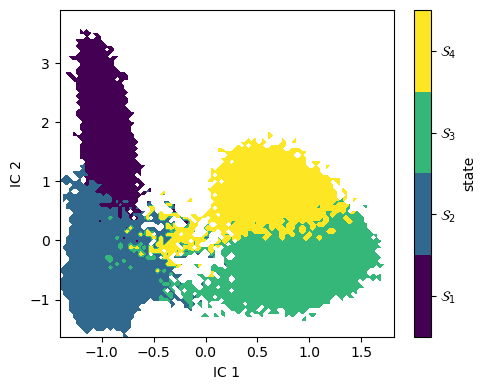

In [88]:
metastable_traj = new_assignment[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

In [89]:
# Compute MFPTs between all pairs of new PCCA+ states
mfpts = np.zeros((len(mapping), len(mapping)))
for i in range(len(mapping)):
    for j in range(len(mapping)):
        if i != j:
            mfpts[i, j] = msm.mfpt(
                msm.metastable_sets[new_assignment[i]],
                msm.metastable_sets[new_assignment[j]]
            )

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4
1,0.00,192240.32,24641.28,2170.27
2,23460517.71,0.00,24695.35,1013.82
3,27863163.00,4220590.67,0.00,1398.55
4,27865231.10,4221568.06,25521.26,0.00


#  testing two states

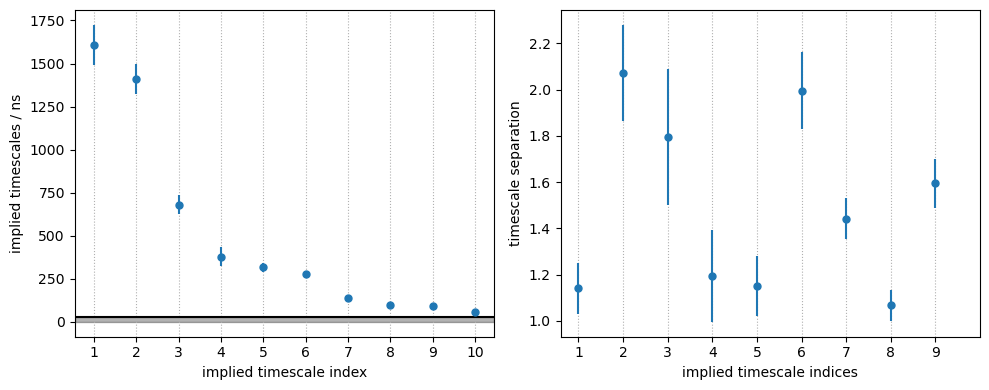

In [90]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 10

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('4state_spectral_update.png',dpi=300)

estimating BayesianMSM:   0%|                                                                                 …

/home/jaybraun/miniconda3/lib/python3.9/site-packages/pyemma/util/statistics.py:59: UserWarning: confidence interval for constant data is not meaningful
  warnings.warn('confidence interval for constant data is not meaningful')
/home/jaybraun/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 246 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)
/home/jaybraun/miniconda3/lib/python3.9/site-packages/msmtools/analysis/api.py:367: UserWarning: truncated eigendecomposition to contain 245 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


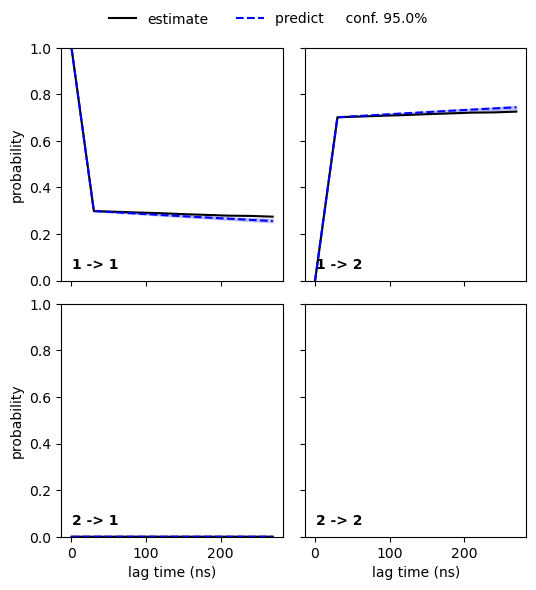

In [91]:
nstates = 2
cktest = msm.cktest(nstates)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
# plt.savefig('2state_cktets.png',dpi = 300)

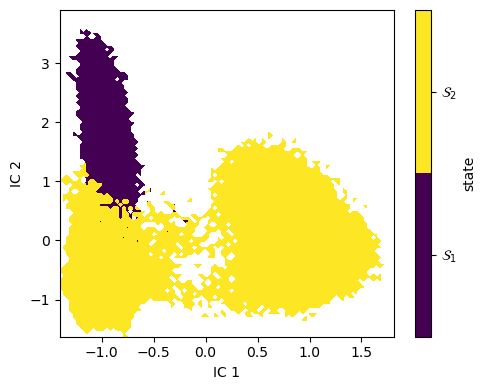

In [92]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('2state_pcca_update.png',dpi=400)

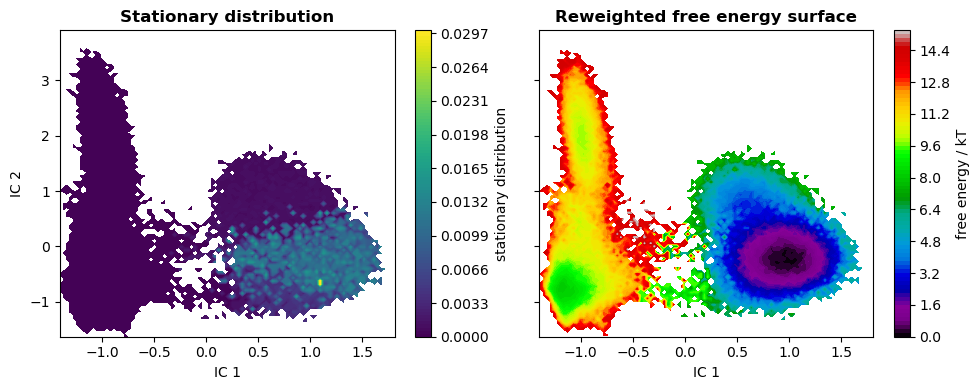

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
# plt.savefig('macro_energy_update.png',dpi=400)

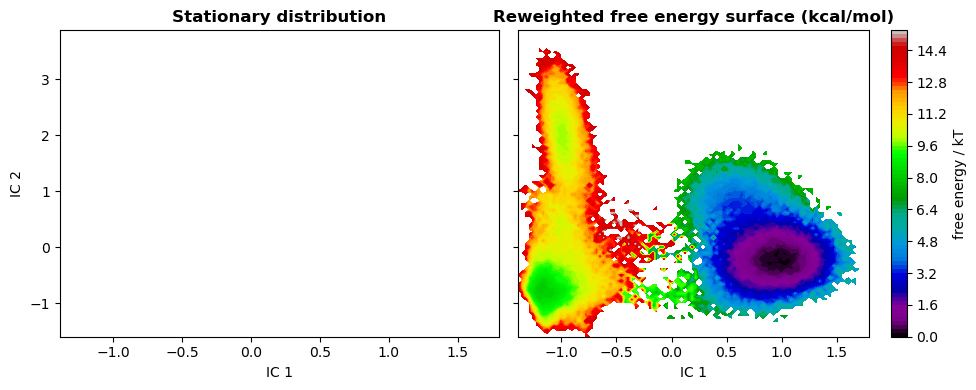

In [94]:
kB = 1.9872036e-3  # kcal/mol·K
T = 310  # You need to provide the temperature in Kelvin

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)


# Plot free energy in kcal/mol
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()) * kB * T,
    ax=axes[1],
    legacy=False)

for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface (kcal/mol)', fontweight='bold')
fig.tight_layout()


In [95]:
T = 310

/tmp/ipykernel_6588/4058992882.py:10: RuntimeWarning: divide by zero encountered in log
  fes_kBT = -np.log(hist)


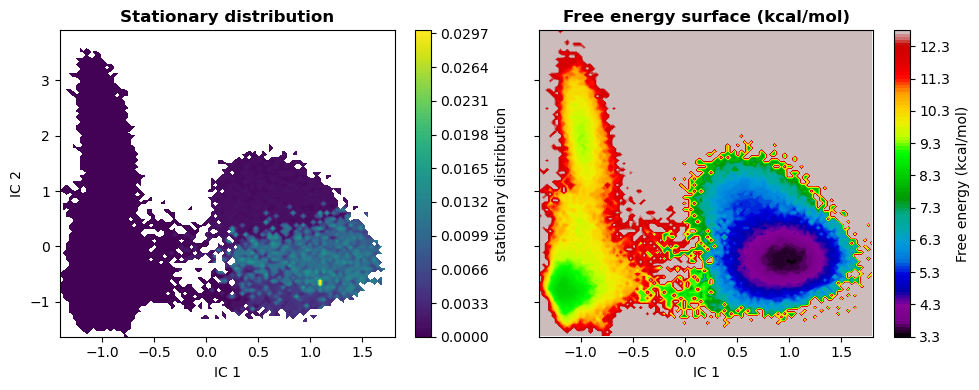

In [96]:
# Compute 2D histogram
hist, xedges, yedges = np.histogram2d(
    tica_concatenated[:, 0], tica_concatenated[:, 1], 
    bins=100, weights=np.concatenate(msm.trajectory_weights()))

# Convert histogram to probability
hist /= hist.sum()

# Convert probabilities to free energy in units of kBT
fes_kBT = -np.log(hist)

# Handle infinities
fes_kBT[np.isinf(fes_kBT)] = fes_kBT[~np.isinf(fes_kBT)].max()

# Convert the free energy to kcal/mol
fes_kcal_per_mol = fes_kBT * kB * T

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot stationary distribution
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')

# Plot free energy in kcal/mol
contourf = axes[1].contourf(
    (xedges[:-1] + xedges[1:]) / 2,
    (yedges[:-1] + yedges[1:]) / 2,
    fes_kcal_per_mol.T,  # transpose due to how meshgrid works
    levels=100,  # you can adjust the number of levels or provide explicit levels
    cmap='nipy_spectral'
)
cbar = fig.colorbar(contourf, ax=axes[1])
cbar.set_label('Free energy (kcal/mol)')

for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Free energy surface (kcal/mol)', fontweight='bold')
fig.tight_layout()
# plt.savefig('2state_pmf.png',dpi=400)


In [97]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2
1,0.00,1136.75
2,27864344.75,0.00


In [64]:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])
print('MFPT 1 -> other: ({:6.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', A, B), msm.sample_std('mfpt', A, B)))
print('MFPT other -> 1: ({:.1f} ± {:5.1f}) ns'.format(
    msm.sample_mean('mfpt', B, A), msm.sample_std('mfpt', B, A)))

MFPT 1 -> other: (1136.6 ±  76.0) ns
MFPT other -> 1: (41994099.6 ± 25908192.1) ns


In [95]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2
1,0.000000e+00,1181.32
2,1.399996e+08,0.00


In [186]:
from itertools import product

mfpt = np.zeros((nstates, nstates))
for i, j in product(range(nstates), repeat=2):
    mfpt[i, j] = msm.mfpt(
        msm.metastable_sets[i],
        msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / ns:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / ns:


,1,2,3,4
1,0.00,913540.36,21062.77,1778.42
2,37658294.31,0.00,21049.28,568.10
3,47587002.13,11119326.97,0.00,1399.30
4,47589791.53,11119930.68,21656.25,0.00


In [225]:
# Given your code:
A = msm.metastable_sets[0]
B = np.concatenate(msm.metastable_sets[1:])

mfpt_A_to_B_mean = msm.sample_mean('mfpt', B, A)
mfpt_A_to_B_std = msm.sample_std('mfpt', B, A)

# Calculate the off-rate from the MFPT
k_off_mean = 1 / mfpt_A_to_B_mean
print(k_off_mean)
k_off_std = k_off_mean * (mfpt_A_to_B_std / mfpt_A_to_B_mean)  # Error propagation for the inverse

print(f"Off-rate (from A to B): {k_off_mean:.2e} ± {k_off_std:.2e} 1/ns")


9.326674151155605e-09
Off-rate (from A to B): 9.33e-09 ± 3.77e-09 1/ns


In [99]:
metastable_traj

array([1, 1, 1, ..., 1, 1, 1])

In [218]:
import math

def calculate_k_on_off(mfpt_bound_to_unbound, mfpt_unbound_to_bound):
    k_off = 1.0 / mfpt_bound_to_unbound
    k_on = 1.0 / mfpt_unbound_to_bound
    return k_on, k_off

def calculate_deltaG(k_on, k_off, temperature):
    R = 8.314  # J/mol·K
    K = k_on / k_off
    K_reverse = k_off / k_on
    deltaG_joule = -R * temperature * math.log(K)
    deltaG_reverse_joule = -R * temperature * math.log(K_reverse)
    
    # Convert from J/mol to kcal/mol
    conversion_factor = 0.000239006
    deltaG_kcal = deltaG_joule * conversion_factor
    deltaG_reverse_kcal = deltaG_reverse_joule * conversion_factor

    print(f"k_on = {k_on:.8f} ns^-1")
    print(f"k_off = {k_off:.8f} ns^-1")
    print(f"Equilibrium constant, K = {K:.2f}")
    print(f"Reverse Equilibrium constant, K_reverse = {K_reverse:.8f}")
    print(f"Delta G (J/mol) = {deltaG_joule:.2f} J/mol")
    print(f"Delta G (kcal/mol) = {deltaG_kcal:.2f} kcal/mol")
    print(f"Delta G reverse (J/mol) = {deltaG_reverse_joule:.2f} J/mol")
    print(f"Delta G reverse (kcal/mol) = {deltaG_reverse_kcal:.2f} kcal/mol")

    return deltaG_kcal, deltaG_reverse_kcal

mfpt_bound_to_unbound = 1.399E8  # ns
mfpt_unbound_to_bound = 1181    # ns
temperature = 310               # K

k_on, k_off = calculate_k_on_off(mfpt_bound_to_unbound, mfpt_unbound_to_bound)
deltaG_forward, deltaG_reverse = calculate_deltaG(k_on, k_off, temperature)


k_on = 0.00084674 ns^-1
k_off = 0.00000001 ns^-1
Equilibrium constant, K = 118458.93
Reverse Equilibrium constant, K_reverse = 0.00000844
Delta G (J/mol) = -30109.31 J/mol
Delta G (kcal/mol) = -7.20 kcal/mol
Delta G reverse (J/mol) = 30109.31 J/mol
Delta G reverse (kcal/mol) = 7.20 kcal/mol


In [134]:
import math

def calculate_deltaG(k_on, k_off, temperature):
    R = 8.314  # J/mol·K
    K = k_on / k_off
    deltaG_joule = -R * temperature * math.log(K)
    
    # Convert from J/mol to kcal/mol
    conversion_factor = 0.000239006
    deltaG_kcal = deltaG_joule * conversion_factor

    print(f"k_on = {k_on:.8f} ns^-1")
    print(f"k_off = {k_off:.8f} ns^-1")
    print(f"Equilibrium constant, K = {K:.2f}")
    print(f"Delta G (J/mol) = {deltaG_joule:.2f} J/mol")
    print(f"Delta G (kcal/mol) = {deltaG_kcal:.2f} kcal/mol")

    return deltaG_kcal

mfpt_bound_to_unbound = 4E8  # ns
mfpt_unbound_to_bound = 1181    # ns
temperature = 310               # K

k_on = 1.0 / mfpt_unbound_to_bound
k_off = 1.0 / mfpt_bound_to_unbound
deltaG = calculate_deltaG(k_on, k_off, temperature)


k_on = 0.00084674 ns^-1
k_off = 0.00000000 ns^-1
Equilibrium constant, K = 338696.02
Delta G (J/mol) = -32816.90 J/mol
Delta G (kcal/mol) = -7.84 kcal/mol


# EXTRACT

In [55]:
import sys
import os
sys.path.insert(0, '../')
import featurize.featurize_v2 as feat_
import featurize.caller_v2 as caller


path = '../../trajdat'
files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.xtc')]

for file in files:
    print(file)


../../trajdat/9_ext.xtc
../../trajdat/1_tot.xtc
../../trajdat/3.1_ext.xtc
../../trajdat/3_ext.xtc
../../trajdat/5_tot.xtc
../../trajdat/rep1_tot.xtc
../../trajdat/rep2_tot.xtc
../../trajdat/rep3_tot.xtc
../../trajdat/rep4.xtc
../../trajdat/rep6_tot2.xtc
../../trajdat/rep2_end.xtc


In [56]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(files, top='../adaptive_sampling_features/10.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./ca_pair/pcca{}_pair.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                               | 0/11 [00:00<?, ?it/s]

['./ca_pair/pcca1_pair.gro',
 './ca_pair/pcca2_pair.gro',
 './ca_pair/pcca3_pair.gro']

In [53]:
A = msm.metastable_sets[0]
B = msm.metastable_sets[3]
flux = pyemma.msm.tpt(msm, A, B)

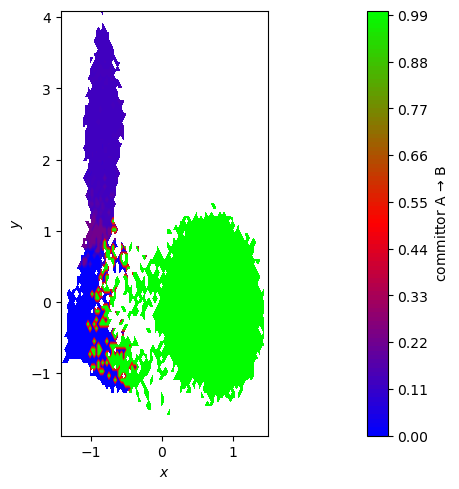

In [54]:
fig, ax = plt.subplots(figsize=(20, 5))
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    flux.committor[dtrajs_concatenated],
    ax=ax,
    cmap='brg',
    mask=True,
    cbar_label=r'committor A $\to$ B')
ax.set_xlabel('$x$')
# ax.set_xlim(-4, 4)
# ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.set_ylabel('$y$')
fig.tight_layout()

In [55]:
cg, cgflux = flux.coarse_grain(msm.metastable_sets)

In [56]:
paths, path_fluxes = cgflux.pathways(fraction=0.99)
print('percentage       \tpath')
print('-------------------------------------')
for i in range(len(paths)):
    print(np.round(path_fluxes[i] / np.sum(path_fluxes), 3),' \t', paths[i] + 1)

percentage       	path
-------------------------------------
0.821  	 [1 4]
0.138  	 [1 3 4]
0.041  	 [1 2 4]
